In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('heart.csv')

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target', ylabel='count'>

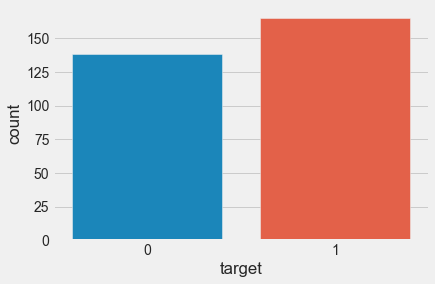

In [47]:
sns.countplot(x='target', data=df)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
df.shape

(303, 14)

In [50]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0


In [52]:
df=df.rename(columns={'age':'Age','sex':'Sex','cp':'Nyeri_dada','trestbps':'Resting_blood','chol':'kolesterol','fbs':'Kadar_gula','restecg':'resting_ekg','thalach':'Rata_Detak_Jantung','exang':'Nyeri_dada','oldpeak':'Penurunan_ST','slope':'Puncak_ST','ca':'Pembuluh darah','thal':'Detak_jantung','target':'Target'})

In [53]:
df.columns

Index(['Age', 'Sex', 'Nyeri_dada', 'Resting_blood', 'kolesterol', 'Kadar_gula',
       'resting_ekg', 'Rata_Detak_Jantung', 'Nyeri_dada', 'Penurunan_ST',
       'Puncak_ST', 'Pembuluh darah', 'Detak_jantung', 'Target'],
      dtype='object')

In [54]:
df.isnull().sum()

Age                   0
Sex                   0
Nyeri_dada            0
Resting_blood         0
kolesterol            0
Kadar_gula            0
resting_ekg           0
Rata_Detak_Jantung    0
Nyeri_dada            0
Penurunan_ST          0
Puncak_ST             0
Pembuluh darah        0
Detak_jantung         0
Target                0
dtype: int64

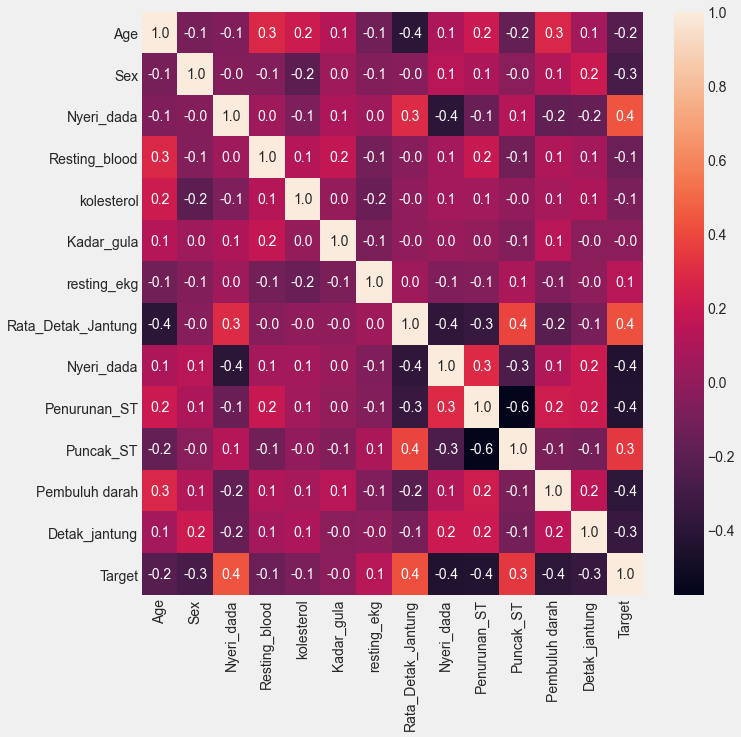

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rata_Detak_Jantung'>

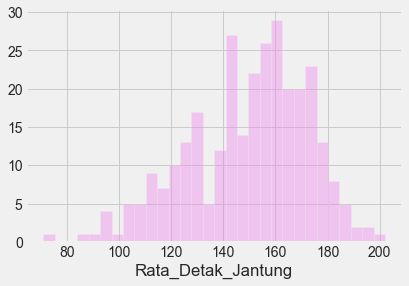

In [56]:
sns.distplot(df['Rata_Detak_Jantung'],kde=False,bins=30,color='violet')

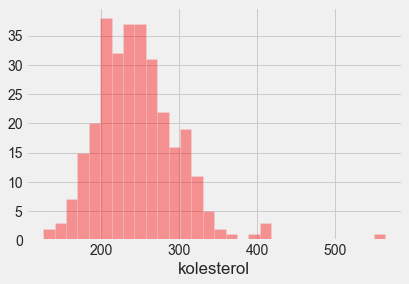

In [57]:
sns.distplot(df['kolesterol'],kde=False,bins=30,color='red')
plt.show()

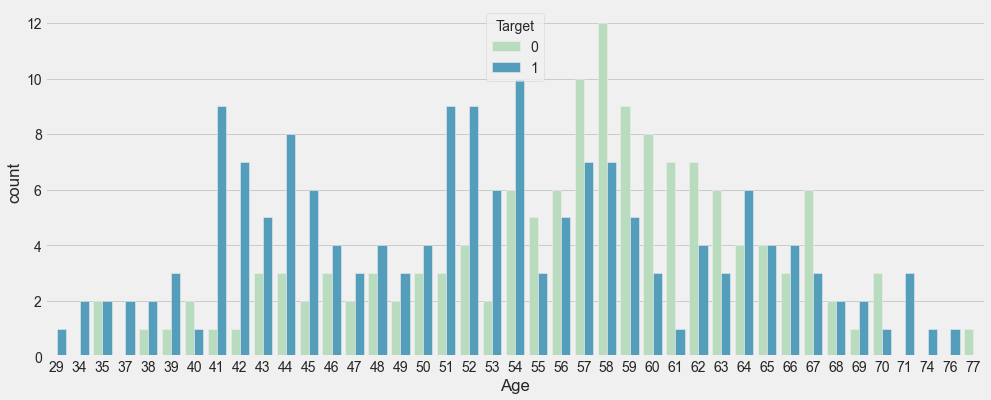

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = df, hue = 'Target',palette='GnBu')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


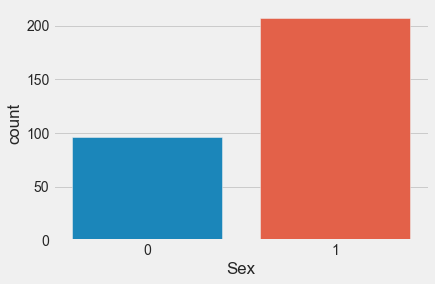

In [60]:
#Sex (1 = male; 0 = female)
sns.countplot(df.Sex)
plt.show()

In [82]:
X= df.drop('Target',axis=1)
y=df['Target']

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [97]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


In [100]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [101]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [102]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

AttributeError: module 'numpy' has no attribute 'matrix'